##Построение ML-моделей, подбор гиперпараметров, выбор модели с наилучшим качеством

В данном ноутбуке решается задача регрессии. В первой части ноутбука модели будут обучены только на числовых признаках. Используемые модели: линейная регрессия, нелинейная модель k-ближайших соседей, случайный лес, градиентный бустинг и CatBoostRegressor. Сначала модели будут обучены с параметрами по умолчанию. Затем произведем подбор гиперпараметров по сетке для каждой модели. Метрикой качества была выбрана R^2, т. к. ее легко интерпретировать.

Произведем импорт библиотек и загрузим данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/SidorovaLiza/Predicting-the-age-of-abalone/main/clean_abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.514000,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.225500,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.677000,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.827574,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.205000,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4173, 9)

Выделим переменную Rings в y, остальные данные будут матрицей объект-признак X (кроме категориальной переменной Sex). Далее разделим выборку на train и test. Обучим каждую модель на train и проверим качество на test с помощью выбранной метрики r2_score.

In [4]:
X = df.drop('Rings', axis=1)
y = df.Rings

In [5]:
X.drop('Sex', axis=1, inplace=True)

In [6]:
X_train_num, X_test_num, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train_num, y_train)
pred_1 = model_1.predict(X_test_num)

r2_score(y_test, pred_1)

0.530910740667278

In [ ]:
model_2 = KNeighborsRegressor()
model_2.fit(X_train_num, y_train)
pred_2 = model_2.predict(X_test_num)

r2_score(y_test, pred_2)

0.5353411317183272

In [ ]:
model_3 = RandomForestRegressor()
model_3.fit(X_train_num, y_train)
pred_3 = model_3.predict(X_test_num)

r2_score(y_test, pred_3)

0.5561261127803174

In [ ]:
model_4 = GradientBoostingRegressor()
model_4.fit(X_train_num, y_train)
pred_4 = model_4.predict(X_test_num)

r2_score(y_test, pred_4)

0.5505470155529271

In [7]:
pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.4 MB/s eta 0:00:00


In [8]:
from catboost import CatBoostRegressor

model_5 = CatBoostRegressor()
model_5.fit(X_train_num, y_train)
pred_5 = model_5.predict(X_test_num)

r2_score(y_test, pred_5)

Learning rate set to 0.049029
0:	learn: 3.1210161	total: 48.9ms	remaining: 48.9s
1:	learn: 3.0753758	total: 51.3ms	remaining: 25.6s
2:	learn: 3.0241068	total: 53.4ms	remaining: 17.7s
3:	learn: 2.9776990	total: 55.5ms	remaining: 13.8s
4:	learn: 2.9279175	total: 57.7ms	remaining: 11.5s
5:	learn: 2.8861287	total: 59.7ms	remaining: 9.9s
6:	learn: 2.8437162	total: 61.9ms	remaining: 8.78s
7:	learn: 2.8049998	total: 64ms	remaining: 7.94s
8:	learn: 2.7739031	total: 66.1ms	remaining: 7.28s
9:	learn: 2.7411546	total: 68.2ms	remaining: 6.75s
10:	learn: 2.7100628	total: 70.4ms	remaining: 6.33s
11:	learn: 2.6835401	total: 72.6ms	remaining: 5.97s
12:	learn: 2.6590517	total: 74.7ms	remaining: 5.67s
13:	learn: 2.6370239	total: 81.7ms	remaining: 5.75s
14:	learn: 2.6144478	total: 85.4ms	remaining: 5.61s
15:	learn: 2.5897753	total: 88ms	remaining: 5.41s
16:	learn: 2.5737282	total: 90ms	remaining: 5.21s
17:	learn: 2.5522700	total: 92ms	remaining: 5.02s
18:	learn: 2.5334159	total: 94.1ms	remaining: 4.86s
1

0.5771052320906287

Пока что лучшее качество показывают RandomForestRegressor и CatBoostRegressor. У линейной регрессии гиперпараметров нет. Для остальных моделей подберем гиперпараметры по сетке. Для KNeighbors переберем n_neighbors массивом np.arange(1, 20, 1), параметр weghts ['uniform', 'distance'], параметр p [1, 2, 3]. Для остальных моделей существует довольно много гиперпараметров. Ограничимся подбором n_estimators np.arange(10, 1000, 10), а также max_depth np.arange(2, 16, 1)

In [ ]:
params_1 = {'n_neighbors': np.arange(1, 20, 1),
           'weights': ['uniform', 'distance'],
           'p': [1, 2, 3]}
gs_1 = GridSearchCV(KNeighborsRegressor(n_jobs=-1), params_1, scoring='r2', cv=3, n_jobs=-1, verbose=2)
gs_1.fit(X_train_num, y_train)

gs_1.best_score_, gs_1.best_params_

Fitting 3 folds for each of 114 candidates, totalling 342 fits


(0.5313084063513531, {'n_neighbors': 18, 'p': 2, 'weights': 'distance'})

In [ ]:
pred_gs_1 = gs_1.best_estimator_.predict(X_test_num)

r2_score(y_test, pred_gs_1)

0.5705526967093261

In [ ]:
params_2 = {'n_estimators': np.arange(10, 1000, 10),
           'max_depth': np.arange(2, 16, 1)}
gs_2 = GridSearchCV(RandomForestRegressor(n_jobs=-1), params_2, scoring='r2', cv=3, n_jobs=-1, verbose=2)
gs_2.fit(X_train_num, y_train)

gs_2.best_score_, gs_2.best_params_

Fitting 3 folds for each of 1386 candidates, totalling 4158 fits


(0.5270825138760619, {'max_depth': 8, 'n_estimators': 800})

In [ ]:
pred_gs_2 = gs_2.best_estimator_.predict(X_test_num)

r2_score(y_test, pred_gs_2)

0.5589673190198323

In [ ]:
%%time
gs_3 = GridSearchCV(GradientBoostingRegressor(), params_2, scoring='r2', cv=3, n_jobs=-1, verbose=2)
gs_3.fit(X_train_num, y_train)

gs_3.best_score_, gs_3.best_params_

Fitting 3 folds for each of 1386 candidates, totalling 4158 fits
CPU times: total: 22.8 s
Wall time: 47min 11s


(0.515292462986222, {'max_depth': 4, 'n_estimators': 50})

In [ ]:
pred_gs_3 = gs_3.best_estimator_.predict(X_test_num)

r2_score(y_test, pred_gs_3)

0.5572163737165645

In [ ]:
pip install optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
%%time
params_3 = {'n_estimators': np.arange(10, 500, 20),
           'max_depth': np.arange(2, 16, 2)}
gs_4 = GridSearchCV(CatBoostRegressor(), params_3, scoring='r2', cv=3, verbose=2)
gs_4.fit(X_train_num, y_train)

gs_4.best_score_, gs_4.best_params_

Streaming output truncated to the last 5000 lines.
324:	learn: 0.8460398	total: 1m 53s	remaining: 36.5s
325:	learn: 0.8429319	total: 1m 53s	remaining: 36.2s
326:	learn: 0.8391218	total: 1m 53s	remaining: 35.8s
327:	learn: 0.8361444	total: 1m 54s	remaining: 35.5s
328:	learn: 0.8345498	total: 1m 54s	remaining: 35.1s
329:	learn: 0.8314504	total: 1m 54s	remaining: 34.8s
330:	learn: 0.8289296	total: 1m 55s	remaining: 34.4s
331:	learn: 0.8256975	total: 1m 55s	remaining: 34.1s
332:	learn: 0.8212805	total: 1m 55s	remaining: 33.7s
333:	learn: 0.8195220	total: 1m 56s	remaining: 33.4s
334:	learn: 0.8175540	total: 1m 56s	remaining: 33s
335:	learn: 0.8148406	total: 1m 56s	remaining: 32.7s
336:	learn: 0.8147249	total: 1m 56s	remaining: 32.2s
337:	learn: 0.8146430	total: 1m 56s	remaining: 31.8s
338:	learn: 0.8139579	total: 1m 57s	remaining: 31.5s
339:	learn: 0.8126805	total: 1m 57s	remaining: 31.1s
340:	learn: 0.8099080	total: 1m 57s	remaining: 30.8s
341:	learn: 0.8066278	total: 1m 58s	remaining: 30.

(0.5241016869768522, {'max_depth': 4, 'n_estimators': 210})

In [ ]:
cat = CatBoostRegressor(max_depth=4, n_estimators=210)
cat.fit(X_train_num, y_train)
pred_gs_4 = cat.predict(X_test_num)

r2_score(y_test, pred_gs_4)

Learning rate set to 0.174377
0:	learn: 3.0031279	total: 5.16ms	remaining: 1.08s
1:	learn: 2.8590416	total: 7.19ms	remaining: 748ms
2:	learn: 2.7529867	total: 8.78ms	remaining: 606ms
3:	learn: 2.6678029	total: 10.4ms	remaining: 533ms
4:	learn: 2.5937614	total: 13ms	remaining: 535ms
5:	learn: 2.5386522	total: 15.5ms	remaining: 528ms
6:	learn: 2.4966355	total: 17.6ms	remaining: 512ms
7:	learn: 2.4538294	total: 21.5ms	remaining: 544ms
8:	learn: 2.4323919	total: 24.9ms	remaining: 557ms
9:	learn: 2.4034650	total: 28.3ms	remaining: 567ms
10:	learn: 2.3812365	total: 32ms	remaining: 579ms
11:	learn: 2.3592789	total: 35.6ms	remaining: 587ms
12:	learn: 2.3417815	total: 39.1ms	remaining: 593ms
13:	learn: 2.3281209	total: 42.8ms	remaining: 599ms
14:	learn: 2.3141173	total: 46.4ms	remaining: 603ms
15:	learn: 2.3003678	total: 49.9ms	remaining: 605ms
16:	learn: 2.2887102	total: 53.5ms	remaining: 607ms
17:	learn: 2.2779693	total: 57.2ms	remaining: 610ms
18:	learn: 2.2697206	total: 60.6ms	remaining: 60

0.5746009892145248

In [18]:
quality = pd.DataFrame(data=[[0.53, None], [0.54, 0.57], [0.56, 0.56], [0.55, 0.56], [0.58, 0.58]],
                       columns=['Ошибка с гиперпараметрами по умолчанию', 'Ошибка после подбора гиперпараметров'],
                       index=['LinearRegression', 'KNeighborsRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'CatBoostRegressor'])
quality

,Ошибка с гиперпараметрами по умолчанию,Ошибка после подбора гиперпараметров
LinearRegression,0.53,NaN
KNeighborsRegressor,0.54,0.57
RandomForestRegressor,0.56,0.56
GradientBoostingRegressor,0.55,0.56
CatBoostRegressor,0.58,0.58


Лучшее качество на числовых признаках показала модель CatBoostRegressor. Также после подбора гиперпараметров улучшилось качество модели KNeighborsRegressor. Самое же худшее качество показывает модель LinearRegression. Метрика r2_score тем лучше, чем ближе она к единице. Соответственно, ни одна из запущеных моделей не решает задачу достаточно хорошо.

Теперь попробуем использовать все имеющиеся данные. При этом признак Sex закодируем сначала OneHotEncoder, а затем попробуем закодировать LabelEncoder. Обьясняется это тем, что при разведлчном анализе данных было обнаружено, что средние размеры ракушек F немного превышали средние размеры M при одинаковом значении Rings. Ракушки I значительно уступали размерами остальным ракушкам. Также используем MinMaxScaler для числовых признаков.

In [9]:
categorical = ['Sex']
numeric_features = df.columns[1:-1]
numeric_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [10]:
X = df.drop('Rings', axis=1)
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = ct.fit_transform(X_train_all)
X_test_transformed = ct.transform(X_test_all)

In [12]:
new_features = list(ct.named_transformers_['ohe'].get_feature_names_out())
new_features.extend(numeric_features)

new_features

['Sex_F',
 'Sex_I',
 'Sex_M',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight']

In [13]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=new_features)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=new_features)

X_train_transformed.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.0,0.0,0.668966,0.617391,0.625000,0.290243,0.229321,0.241606,0.250623
1,0.0,1.0,0.0,0.406897,0.391304,0.375000,0.077563,0.077673,0.034233,0.061784
2,1.0,0.0,0.0,0.393103,0.382609,0.312500,0.069240,0.049428,0.053983,0.068261
3,0.0,1.0,0.0,0.544828,0.504348,0.541667,0.162741,0.153329,0.144832,0.114101
4,0.0,0.0,1.0,0.641379,0.613739,0.541667,0.343545,0.281103,0.335089,0.266567


Заново обучим все те же модели на новом пространстве признаков

In [ ]:
lr = LinearRegression()

lr.fit(X_train_transformed, y_train)
pred_1 = lr.predict(X_test_transformed)

r2_score(y_test, pred_1)

0.547874833468734

In [ ]:
knn = KNeighborsRegressor()

knn.fit(X_train_transformed, y_train)
pred_2 = knn.predict(X_test_transformed)

r2_score(y_test, pred_2)

0.5033173494379244

In [ ]:
rf = RandomForestRegressor()

rf.fit(X_train_transformed, y_train)
pred_3 = rf.predict(X_test_transformed)

r2_score(y_test, pred_3)

0.5580554497577133

In [ ]:
gb = GradientBoostingRegressor()

gb.fit(X_train_transformed, y_train)
pred_4 = gb.predict(X_test_transformed)

r2_score(y_test, pred_4)

0.5627378030075707

In [25]:
cat = CatBoostRegressor()

cat.fit(X_train_transformed, y_train)
pred_5 = cat.predict(X_test_transformed)

r2_score(y_test, pred_5)

Learning rate set to 0.049029
0:	learn: 3.1227871	total: 2.43ms	remaining: 2.43s
1:	learn: 3.0681115	total: 4.88ms	remaining: 2.44s
2:	learn: 3.0195302	total: 7.01ms	remaining: 2.33s
3:	learn: 2.9707439	total: 9.17ms	remaining: 2.28s
4:	learn: 2.9298472	total: 11.4ms	remaining: 2.27s
5:	learn: 2.8859486	total: 13.6ms	remaining: 2.26s
6:	learn: 2.8456378	total: 15.8ms	remaining: 2.24s
7:	learn: 2.8089794	total: 18ms	remaining: 2.23s
8:	learn: 2.7780189	total: 20.3ms	remaining: 2.23s
9:	learn: 2.7453211	total: 22.8ms	remaining: 2.26s
10:	learn: 2.7167771	total: 26.2ms	remaining: 2.35s
11:	learn: 2.6865853	total: 28.4ms	remaining: 2.33s
12:	learn: 2.6639691	total: 30.5ms	remaining: 2.32s
13:	learn: 2.6383466	total: 32.7ms	remaining: 2.3s
14:	learn: 2.6126766	total: 34.8ms	remaining: 2.29s
15:	learn: 2.5875157	total: 37ms	remaining: 2.27s
16:	learn: 2.5675718	total: 39.2ms	remaining: 2.26s
17:	learn: 2.5477282	total: 41.3ms	remaining: 2.25s
18:	learn: 2.5302724	total: 43.8ms	remaining: 2.2

0.5839803548895867

In [26]:
r2_score(y_test, pred_5)

0.5839803548895867

Теперь проделаем все то же самое, что и в ячейках выше, но закодируем признак Sex при помощи labelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
scaler = MinMaxScaler()

X_train_all.Sex = label.fit_transform(X_train_all.Sex)
X_test_all.Sex = label.transform(X_test_all.Sex)

X_train_all = scaler.fit_transform(X_train_all)
X_test_All = scaler.transform(X_test_all)

X_train_all = pd.DataFrame(data=X_train_all, columns=X.columns)
X_test_all = pd.DataFrame(data=X_test_all, columns=X.columns)

X_train_all

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.0,0.668966,0.617391,0.625000,0.290243,0.229321,0.241606,0.250623
1,0.5,0.406897,0.391304,0.375000,0.077563,0.077673,0.034233,0.061784
2,0.0,0.393103,0.382609,0.312500,0.069240,0.049428,0.053983,0.068261
3,0.5,0.544828,0.504348,0.541667,0.162741,0.153329,0.144832,0.114101
4,1.0,0.641379,0.613739,0.541667,0.343545,0.281103,0.335089,0.266567
...,...,...,...,...,...,...,...,...
3124,0.0,0.593103,0.582609,0.458333,0.202054,0.171150,0.173799,0.143996
3125,0.0,0.820690,0.860870,0.750000,0.491766,0.364156,0.398947,0.397110
3126,1.0,0.627586,0.626087,0.458333,0.249336,0.224950,0.214615,0.132536
3127,1.0,0.696552,0.686957,0.604167,0.292368,0.215198,0.259381,0.242152


In [ ]:
lr = LinearRegression()

lr.fit(X_train_all, y_train)
pred_1 = lr.predict(X_test_all)

r2_score(y_test, pred_1)

0.2513493620811367

In [ ]:
knn = KNeighborsRegressor()

knn.fit(X_train_all, y_train)
pred_2 = knn.predict(X_test_all)

r2_score(y_test, pred_2)

0.3402856419798742

In [ ]:
rf = RandomForestRegressor()

rf.fit(X_train_all, y_train)
pred_3 = rf.predict(X_test_all)

r2_score(y_test, pred_3)

0.4167546436962495

In [ ]:
gb = GradientBoostingRegressor()

gb.fit(X_train_all, y_train)
pred_4 = gb.predict(X_test_all)

r2_score(y_test, pred_4)

0.3490140974227294

In [ ]:
cat = CatBoostRegressor()

cat.fit(X_train_all, y_train)
pred_5 = cat.predict(X_test_all)

r2_score(y_test, pred_5)

Learning rate set to 0.049029
0:	learn: 3.1198092	total: 6.13ms	remaining: 6.12s
1:	learn: 3.0661043	total: 12.8ms	remaining: 6.37s
2:	learn: 3.0187828	total: 19ms	remaining: 6.3s
3:	learn: 2.9737707	total: 25.4ms	remaining: 6.32s
4:	learn: 2.9275648	total: 31.8ms	remaining: 6.32s
5:	learn: 2.8893507	total: 41.3ms	remaining: 6.83s
6:	learn: 2.8524388	total: 47.4ms	remaining: 6.72s
7:	learn: 2.8171807	total: 51.9ms	remaining: 6.43s
8:	learn: 2.7825133	total: 58.4ms	remaining: 6.43s
9:	learn: 2.7483449	total: 67.2ms	remaining: 6.65s
10:	learn: 2.7149968	total: 70.7ms	remaining: 6.35s
11:	learn: 2.6906444	total: 75.7ms	remaining: 6.24s
12:	learn: 2.6613441	total: 80.8ms	remaining: 6.13s
13:	learn: 2.6338806	total: 87.2ms	remaining: 6.14s
14:	learn: 2.6079710	total: 91.1ms	remaining: 5.98s
15:	learn: 2.5855330	total: 97.7ms	remaining: 6.01s
16:	learn: 2.5643690	total: 106ms	remaining: 6.13s
17:	learn: 2.5442977	total: 111ms	remaining: 6.05s
18:	learn: 2.5270521	total: 115ms	remaining: 5.92

0.23308377260467095

Качество модели, полученное на данных, трансформированных при помощи LabelEncoder, сильно ниже, чем при кодировке OneHotEncoder. Поэтому для подбора гиперпараметров будем использовать данные, трансформированные с помощью OneHotEncoder. Подбирать будем те же гиперпараметры, что и при работе с числовыми признаками.

In [ ]:
%%time
params_1 = {'n_neighbors': np.arange(1, 20, 1),
           'weights': ['uniform', 'distance'],
           'p': [1, 2, 3]}
gs_1 = GridSearchCV(KNeighborsRegressor(n_jobs=-1), params_1, scoring='r2', cv=3, n_jobs=-1, verbose=2)
gs_1.fit(X_train_transformed, y_train)

gs_1.best_score_, gs_1.best_params_

Fitting 3 folds for each of 114 candidates, totalling 342 fits
CPU times: user 557 ms, sys: 111 ms, total: 669 ms
Wall time: 24 s


(0.49437193889394293, {'n_neighbors': 13, 'p': 2, 'weights': 'distance'})

In [ ]:
pred_gs_1 = gs_1.best_estimator_.predict(X_test_transformed)

r2_score(y_test, pred_gs_1)

0.5300793272538034

In [ ]:
%%time
params_2 = {'n_estimators': np.arange(10, 900, 20),
           'max_depth': np.arange(2, 16, 1)}
gs_2 = GridSearchCV(RandomForestRegressor(n_jobs=-1), params_2, scoring='r2', cv=3, n_jobs=-1, verbose=2)
gs_2.fit(X_train_transformed, y_train)

gs_2.best_score_, gs_2.best_params_

Fitting 3 folds for each of 630 candidates, totalling 1890 fits
CPU times: user 57.4 s, sys: 8.76 s, total: 1min 6s
Wall time: 1h 31min 20s


(0.5348786165801775, {'max_depth': 8, 'n_estimators': 590})

In [ ]:
pred_gs_2 = gs_2.best_estimator_.predict(X_test_transformed)

r2_score(y_test, pred_gs_2)

0.5687644144864724

In [ ]:
%%time
gs_3 = GridSearchCV(GradientBoostingRegressor(), params_2, scoring='r2', cv=3, n_jobs=-1, verbose=2)
gs_3.fit(X_train_transformed, y_train)

gs_3.best_score_, gs_3.best_params_

Fitting 3 folds for each of 630 candidates, totalling 1890 fits
CPU times: user 1min 1s, sys: 14 s, total: 1min 15s
Wall time: 1h 55min 18s


(0.5215429256295763, {'max_depth': 4, 'n_estimators': 50})

In [ ]:
pred_gs_3 = gs_3.best_estimator_.predict(X_test_transformed)

r2_score(y_test, pred_gs_3)

0.5668684679763547

In [14]:
%%time
params_3 = {'n_estimators': np.arange(10, 500, 20),
           'max_depth': np.arange(2, 16, 2)}
gs_4 = GridSearchCV(CatBoostRegressor(), params_3, scoring='r2', cv=3, verbose=2)
gs_4.fit(X_train_transformed, y_train)

gs_4.best_score_, gs_4.best_params_

Выходные данные были обрезаны до нескольких последних строк (5000).
364:	learn: 0.6774358	total: 2m 25s	remaining: 26.6s
365:	learn: 0.6764407	total: 2m 25s	remaining: 26.2s
366:	learn: 0.6749754	total: 2m 25s	remaining: 25.8s
367:	learn: 0.6743673	total: 2m 26s	remaining: 25.3s
368:	learn: 0.6742691	total: 2m 26s	remaining: 24.9s
369:	learn: 0.6729721	total: 2m 26s	remaining: 24.5s
370:	learn: 0.6727081	total: 2m 27s	remaining: 24.1s
371:	learn: 0.6704633	total: 2m 27s	remaining: 23.7s
372:	learn: 0.6703924	total: 2m 27s	remaining: 23.2s
373:	learn: 0.6673397	total: 2m 28s	remaining: 22.8s
374:	learn: 0.6660104	total: 2m 28s	remaining: 22.4s
375:	learn: 0.6634350	total: 2m 28s	remaining: 22s
376:	learn: 0.6621993	total: 2m 29s	remaining: 21.6s
377:	learn: 0.6614881	total: 2m 29s	remaining: 21.2s
378:	learn: 0.6614005	total: 2m 30s	remaining: 20.7s
379:	learn: 0.6605038	total: 2m 30s	remaining: 20.3s
380:	learn: 0.6596314	total: 2m 30s	remaining: 19.9s
381:	learn: 0.6584253	total: 2m 3

(0.5254091416335968, {'max_depth': 4, 'n_estimators': 250})

In [15]:
pred_gs_4 = gs_4.best_estimator_.predict(X_test_transformed)

r2_score(y_test, pred_gs_4)

0.5812415822417186

In [16]:
quality_1 = pd.DataFrame(data=[[0.55, None], [0.56, 0.57], [0.56, 0.57], [0.56, 0.57], [0.58, 0.58]],
                       columns=['Ошибка с гиперпараметрами по умолчанию', 'Ошибка после подбора гиперпараметров'],
                       index=['LinearRegression', 'KNeighborsRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'CatBoostRegressor'])
quality_1

,Ошибка с гиперпараметрами по умолчанию,Ошибка после подбора гиперпараметров
LinearRegression,0.55,NaN
KNeighborsRegressor,0.56,0.57
RandomForestRegressor,0.56,0.57
GradientBoostingRegressor,0.56,0.57
CatBoostRegressor,0.58,0.58


In [19]:
quality

,Ошибка с гиперпараметрами по умолчанию,Ошибка после подбора гиперпараметров
LinearRegression,0.53,NaN
KNeighborsRegressor,0.54,0.57
RandomForestRegressor,0.56,0.56
GradientBoostingRegressor,0.55,0.56
CatBoostRegressor,0.58,0.58


В верхней таблице представлены значения ошибки r2_score до подбора гиперпараметров и после на всех имеющихся признаках. В нижней таблице - только на числовых.

Ошибку на линейной регрессии удалось уменьшить на 0.02, добавив категориальный признак.

Ошибка на модели knn после подбора гиперпараметров без категориального признака и с ним одинаковая. Наличие признака Sex не повлияло на качество модели knn.

Модель random Forest показала лучшее качество после подбора гиперпараметров без признака Sex.

То же самое случилось и с градиентным бустингом. И для случаного леса, и для бустинга признак Sex ухулшил качество модели на 0.01.

Модель CatBoost показала наилучшее качество среди всех моделей. Признак Sex не повлиял на качество модели.

Итоговой моделью в данном исследовании принята CatBoostRegressor с параметрами по умолчанию. Ее качество - 0.58 по метрике r2_score. Метрика достаточно далека от единицы. Возможно, при дальнейших исследованиях стоит попробовать в модели Feature Engineering для дальнейшего улучшения качества модели

Для оценки важности признаков построим Explainer Dashboard

In [20]:
!pip install explainerdashboard -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.9/286.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.0 MB/s eta 0:00:00


In [22]:
from explainerdashboard import RegressionExplainer, ExplainerDashboard

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
explainer = RegressionExplainer(cat, X_test_transformed, y_test)

Generating self.shap_explainer = shap.TreeExplainer(model)


In [28]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:516: UserWarning: JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.


Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [29]:
db.run()

Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)


<IPython.core.display.Javascript object>

Dash app running on:


<IPython.core.display.Javascript object>

In [30]:
!pip install eli5 -q
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [31]:
import eli5 # permutation importance
import shap # shapley

In [32]:
perm = eli5.sklearn.PermutationImportance(cat, random_state=42).\
    fit(X_train_transformed, y_train)

eli5.show_weights(perm, feature_names = X_train_transformed.columns.tolist())

Weight,Feature
1.5593 ± 0.0316,Shucked weight
0.6333 ± 0.0262,Whole weight
0.5768 ± 0.0226,Shell weight
0.1741 ± 0.0113,Viscera weight
0.1601 ± 0.0047,Height
0.1432 ± 0.0038,Diameter
0.1327 ± 0.0031,Length
0.0305 ± 0.0030,Sex_I
0.0089 ± 0.0006,Sex_F
0.0055 ± 0.0011,Sex_M


In [35]:
f = lambda x: cat.predict(x)
med = X_train_transformed.median().values.reshape((1, 10))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_test_transformed)

Exact explainer: 1045it [00:10, 20.88it/s]                           


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



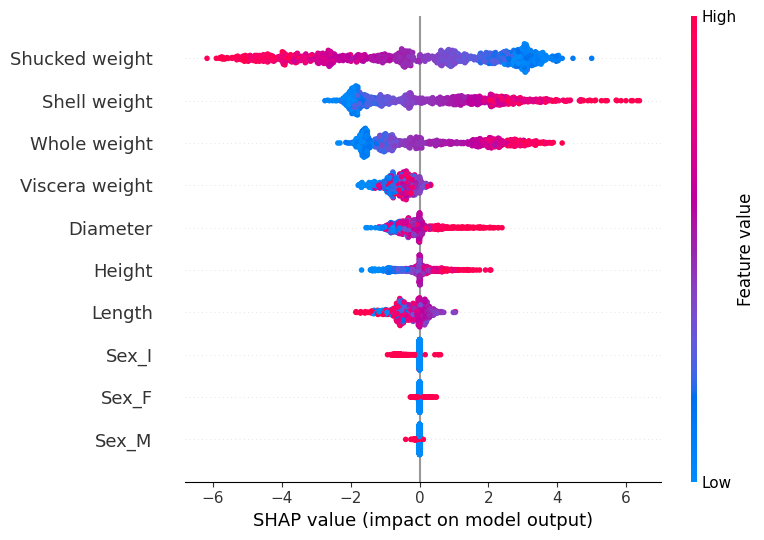

In [36]:
shap.summary_plot(shap_values, X_test_transformed)

Для оценки важности признаков был построен Explainer Dashboard, а также отдельно применены подходы Permutation Importance и Shapley values. Оба метода выделяют как наиболее важные весовые признаки.

Самый важный признак по мнению обоих подходов - Shucked weight. Причем, по диаграмме SHAP value можно видеть, что данный признак имеет высокую отрицательную корреляцию с целевой переменной (красные точки расположены в отрицательной части оси х). А вот признак Shell weight имеет высокую положительную корреляцию с целевой переменной. Из всех весовых признаков наименее важен Viscera weight.

Далее по важности идут размеры ракушки. Наименее важным оказался признак Sex. Причем, важно, если в данном признаке стоит значение I. Полученные с помощью OneHotEncoding признаки Sex_F и Sex_M имеют самое маленькое значение для модели.

##Анализ двух индивидуальных прогнозов

Для первого индивидуального прогноза был выбран объект 217. Модель предсказала для него значение 14.16, тогда как истинное значение для этого объекта - 15. Ошибка составила 0.84. Наибольший вклад в предсказание на 217 объекте вносит признак Shucked weight. Согласно дашборду, этот признак увеличил предсказание на 2.19. Далее идут остальные весовые признаки. Самым важным показателем размера оказался признак Height. Он увеличил предсказание на 0.17. Отрицательно повлияли на предсказание следующие признаки: Whole weight, Sex_F, Sex_M.

Для второго индивидуального прогноза был выбран объект 518. Предсказанное для него значение - 11.42. Истинное значение - 16. На данном объекте получилась большая ошибка: 4.58. Посмотрим, почему так получилось.

Самый большой вклад внес признак Shell weight. Он увеличил предсказание модели на 0.41. Самый важный из размеров вновь оказался Height. Он увеличил предсказание на 0.29. Отрицательный вклад внесли признаки Whole weight и Diameter. Суммарный вклад всех признаков получился около 1.5. Большая часть предсказания основывается на среднем значении целевой переменной. Возможно, поэтому ошибка на данном объекте получилась большой.